# Twitter Data Analysis and Visualization
### Created by Zaur Gouliev, 2024 | [GitHub](https://github.com/gouliev)

This notebook is a comprehensive tool for cleaning, analyzing, and visualizing data extracted from Twitter using the Instant Data Scraper. The notebook progresses through several stages:

1. **Data Loading:** Imports data from a CSV file into a pandas DataFrame.

2. **Data Cleaning:** Processes the imported data to handle duplicates, missing values, and format inconsistencies, particularly in dates and textual content.

3. **Data Analysis:** Analyzes the cleaned data to extract meaningful insights, such as the distribution of posts across different usernames and the temporal patterns of postings.

4. **Data Visualization:** Deploys a series of visualizations using seaborn and matplotlib to graphically represent the analyzed data, which helps in identifying trends and patterns more intuitively.

5. **Output Generation:** Saves the created visualizations as high-quality images for external use and reporting.

Each step is modular and commented, and useful for the Chrome extension Instant Data Scraper (https://chromewebstore.google.com/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import datetime

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [44]:
filepath = 'twitter.csv'

In [45]:
# Load the data
def load_data(filepath):
    """Load the CSV file into a DataFrame."""
    return pd.read_csv(filepath)

In [46]:
# Clean the data
def clean_data(df):
    """
    Perform data cleaning steps on the DataFrame.
    This may include removing duplicates, handling missing values,
    parsing dates, and converting data types.
    """
    df.drop_duplicates(inplace=True)
    df['dates of postage'] = pd.to_datetime(df['dates of postage'], errors='coerce', format='%b-%d')
    df['dates of postage'] = df['dates of postage'].apply(lambda x: x.replace(year=datetime.datetime.now().year))
    df.dropna(subset=['dates of postage'], inplace=True)
    return df

In [47]:
# Analyze the data
def analyze_data(df):
    """
    Generate insights from the DataFrame.
    """
    tweet_counts = df['usernames'].value_counts().reset_index()
    tweet_counts.columns = ['Username', 'Post Count']

    table = PrettyTable()
    table.field_names = tweet_counts.columns
    for _, row in tweet_counts.iterrows():
        table.add_row(row)

    return tweet_counts, table

In [48]:
import os

# Visualize the data
def visualize_data(df, df_tweet_counts):
    """
    Create visualizations to display data insights and save them as high-quality images.
    """
    # Ensure output directory exists
    output_dir = 'visualization_outputs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Tweets per user
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Username', y='Post Count', data=df_tweet_counts)
    plt.title('Number of Posts per Username')
    plt.xlabel('Username')
    plt.ylabel('Post Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/tweets_per_user.png', dpi=300)  # Save as high-quality PNG
    plt.show()

    # Posts over time
    plt.figure(figsize=(10, 6))
    df['dates of postage'].value_counts().sort_index().plot(kind='line')
    plt.title('Posts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/posts_over_time.png', dpi=300)  # Save as high-quality PNG
    plt.show()

    # Word cloud for comments
    text = ' '.join(df['comment'].dropna().tolist())
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Comments')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/word_cloud.png', dpi=300)  # Save as high-quality PNG
    plt.show()


In [51]:
# Main function to run the steps
def main():
    df = load_data('twitter.csv')
    df_clean = clean_data(df)
    df_tweet_counts, table = analyze_data(df_clean)

    # Print the table
    print(table)

    # Visualize the data
    visualize_data(df_clean, df_tweet_counts)

+-----------------------------+------------+
|           Username          | Post Count |
+-----------------------------+------------+
| Lawyers For Justice Ireland |     3      |
|         Jim Ferguson        |     2      |
|        MichaeloKeeffe       |     2      |
|       TheIrishWatchdog      |     2      |
|         Niall O’Hara        |     2      |
|            spiked           |     2      |
|       Keira Connnolly       |     1      |
|        Luke O' Connor       |     1      |
|       Off-Grid Ireland      |     1      |
|           Lorraine          |     1      |
|         Gavin Pepper        |     1      |
|         Ben Scallan         |     1      |
|        Hermann Kelly        |     1      |
+-----------------------------+------------+


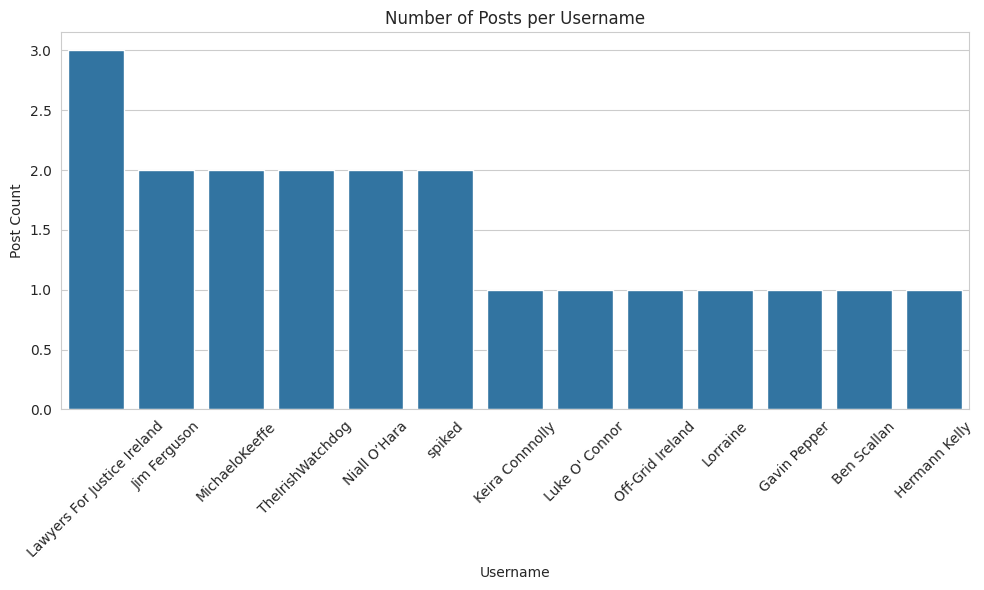

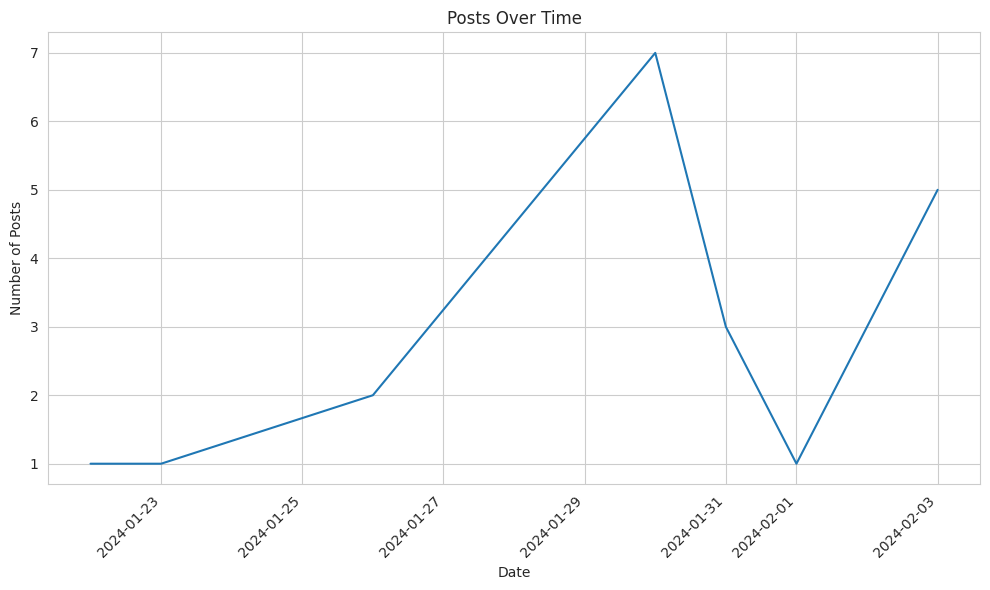

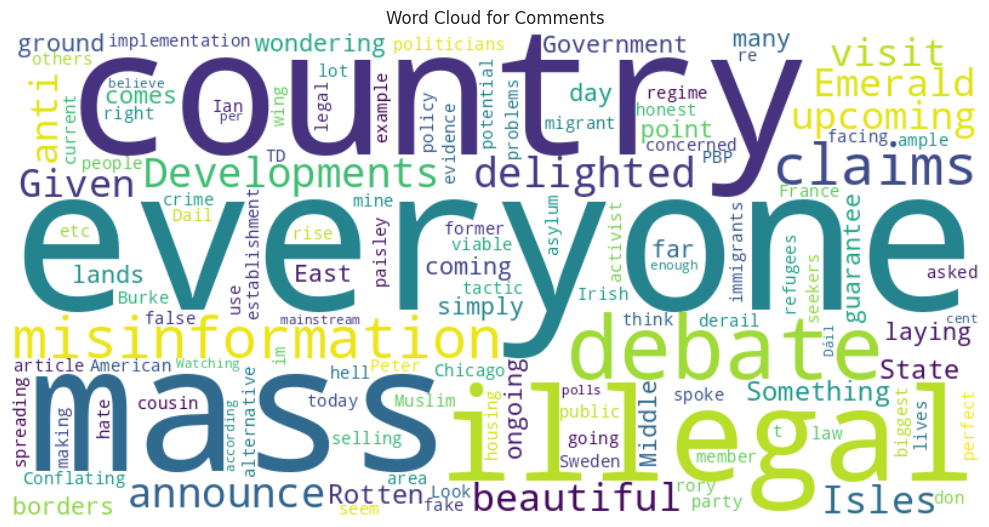

In [52]:
# Run the main function
if __name__ == "__main__":
    main()